## 17 Qubit Surface Code

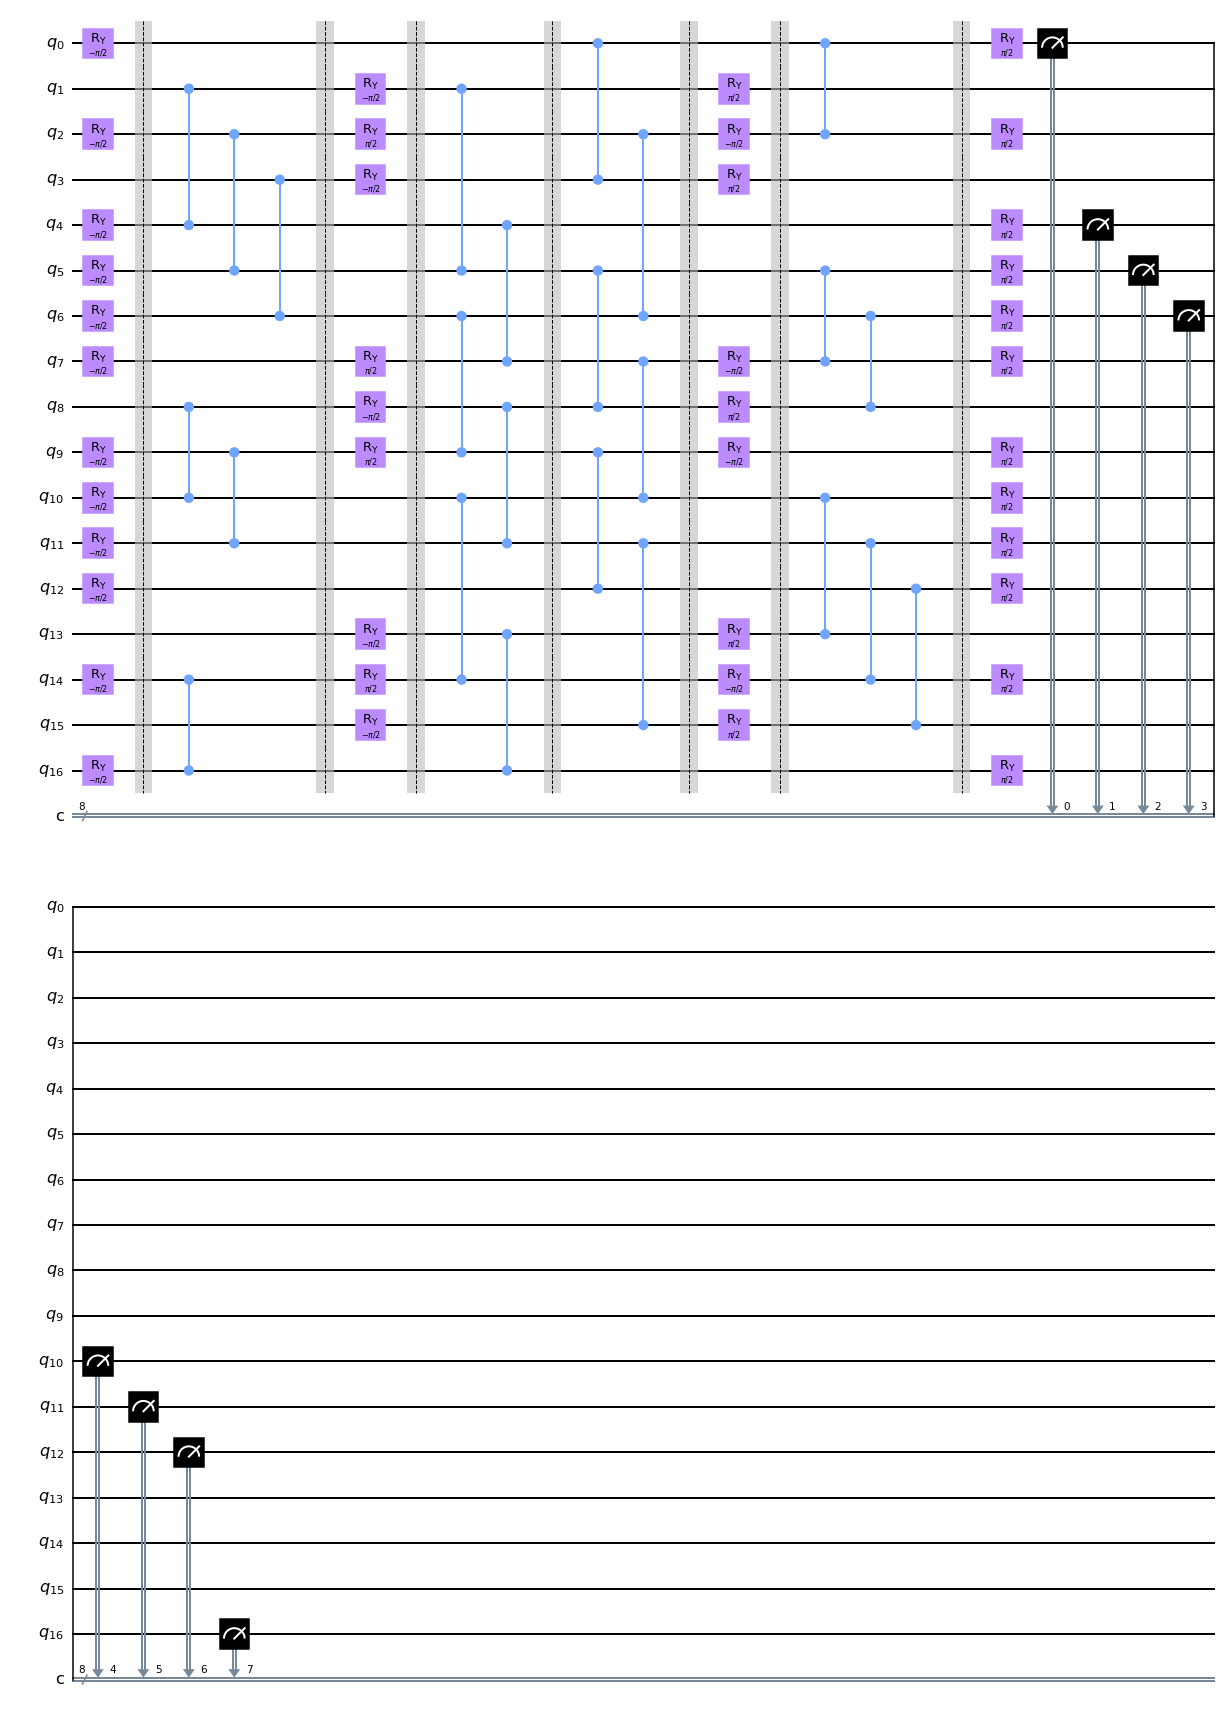

In [4]:
import numpy as np
from math import *
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

sc = QuantumCircuit(17,8)
round1 = [0,2,4,5,6,7,9,10,11,12,14,16]
round2_m = [1,3,8,13,15]
round2_p = [2,7,9,14]
round3_m = [2,7,9,14]
round3_p = [1,3,8,13,15]
final_rot = [0,2,4,5,6,7,9,10,11,12,14,16]
meas_qubits = [0,4,5,6,10,11,12,16]

#Create the first rotations
for i in range(0,17):
    if i in round1:
        sc.ry(-pi/2,i)

sc.barrier()
#Firstround of  cz gates
sc.cz(1,4)
sc.cz(2,5)
sc.cz(3,6)
sc.cz(8,10)
sc.cz(9,11)
sc.cz(14,16)

sc.barrier()
#Second rotations
for i in range(0,17):
    if i in round2_m:
        sc.ry(-pi/2,i)
    if i in round2_p:
        sc.ry(pi/2,i)
sc.barrier()
#Second round of cz gates
sc.cz(1,5)
sc.cz(4,7)
sc.cz(6,9)
sc.cz(8,11)
sc.cz(10,14)
sc.cz(13,16)

sc.barrier()
#Third round of cz gates
sc.cz(0,3)
sc.cz(2,6)
sc.cz(5,8)
sc.cz(7,10)
sc.cz(9,12)
sc.cz(11,15)

sc.barrier()

#Third rotations
for i in range(0,17):
    if i in round3_m:
        sc.ry(-pi/2,i)
    if i in round3_p:
        sc.ry(pi/2,i)

sc.barrier()
#Fourth round of cz gates
sc.cz(0,2)
sc.cz(5,7)
sc.cz(6,8)
sc.cz(10,13)
sc.cz(11,14)
sc.cz(12,15)

sc.barrier()
#Final rotations
for i in range(0,17):
    if i in final_rot:
        sc.ry(pi/2,i)

for i in range(0,8):
    sc.measure(meas_qubits[i],i)

sc.draw('mpl')

{'10100000': 10, '10000100': 10, '10100100': 6, '00000100': 9, '00100101': 7, '00000001': 7, '00100001': 8, '10100101': 6, '00100000': 8, '10000000': 4, '10100001': 4, '00100100': 7, '10000101': 5, '00000101': 4, '00000000': 2, '10000001': 3}


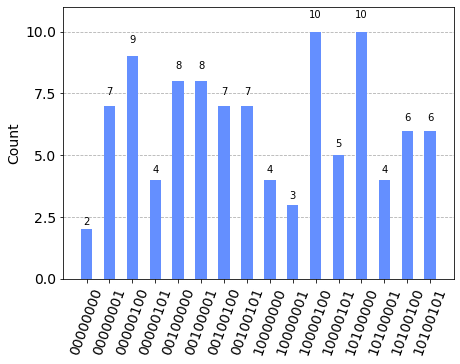

In [5]:
backend = BasicAer.get_backend('qasm_simulator') #The device to run on
result = backend.run(transpile(sc,backend), shots = 100).result()
counts = result.get_counts() #Get our result


print(counts)
plot_histogram(counts)

Creating a gate to allow us to initialize

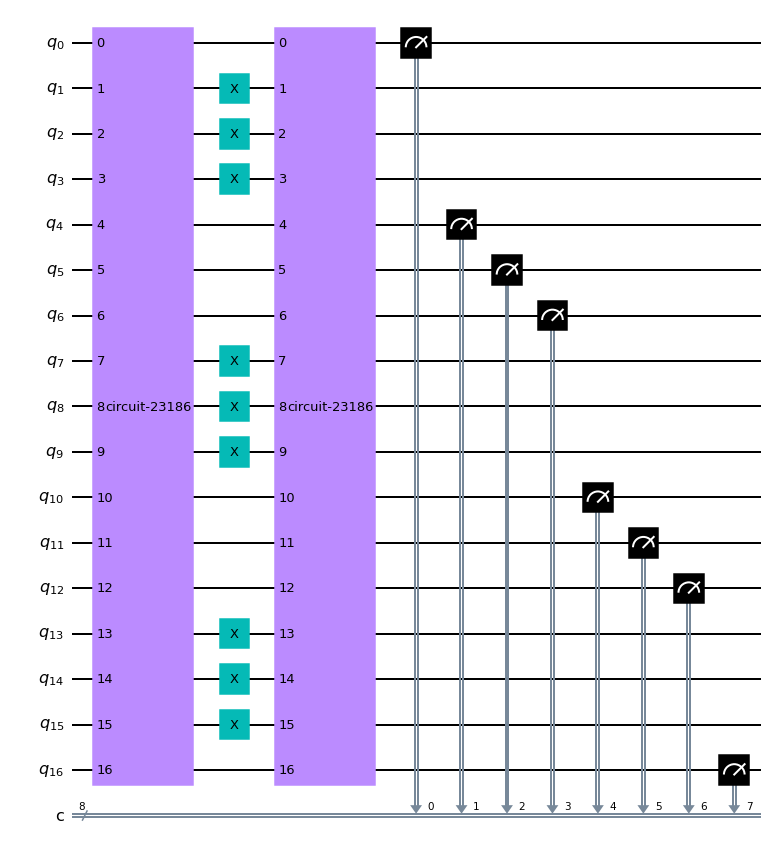

In [52]:
from math import *
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

sc = QuantumCircuit(17)
round1 = [0,2,4,5,6,7,9,10,11,12,14,16]
round2_m = [1,3,8,13,15]
round2_p = [2,7,9,14]
round3_m = [2,7,9,14]
round3_p = [1,3,8,13,15]
final_rot = [0,2,4,5,6,7,9,10,11,12,14,16]
meas_qubits = [0,4,5,6,10,11,12,16]

#Create the first rotations
for i in range(0,17):
    if i in round1:
        sc.ry(-pi/2,i)


#Firstround of  cz gates
sc.cz(1,4)
sc.cz(2,5)
sc.cz(3,6)
sc.cz(8,10)
sc.cz(9,11)
sc.cz(14,16)


#Second rotations
for i in range(0,17):
    if i in round2_m:
        sc.ry(-pi/2,i)
    if i in round2_p:
        sc.ry(pi/2,i)

#Second round of cz gates
sc.cz(1,5)
sc.cz(4,7)
sc.cz(6,9)
sc.cz(8,11)
sc.cz(10,14)
sc.cz(13,16)


#Third round of cz gates
sc.cz(0,3)
sc.cz(2,6)
sc.cz(5,8)
sc.cz(7,10)
sc.cz(9,12)
sc.cz(11,15)


#Third rotations
for i in range(0,17):
    if i in round3_m:
        sc.ry(-pi/2,i)
    if i in round3_p:
        sc.ry(pi/2,i)


#Fourth round of cz gates
sc.cz(0,2)
sc.cz(5,7)
sc.cz(6,8)
sc.cz(10,13)
sc.cz(11,14)
sc.cz(12,15)


#Final rotations
for i in range(0,17):
    if i in final_rot:
        sc.ry(pi/2,i)


my_gate = sc.to_gate() #create gate from surface code

from qiskit_aer.noise import pauli_error
meas_qubits = [0,4,5,6,10,11,12,16]

new_circ = QuantumCircuit(17,8)
new_circ.append(my_gate,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


# Construct a 1-qubit bit-flip error
p_error = 0.05
error = pauli_error([('X', p_error/2),('Z', p_error/2), ('I', 1 - p_error)])
    
    
# Combine the circuit and the error channel
for i in range(17):
    if i not in meas_qubits:
        new_circ.append(error, [i])

new_circ.append(my_gate,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
for i in range(0,8):
    new_circ.measure(meas_qubits[i],i)

new_circ.draw('mpl')

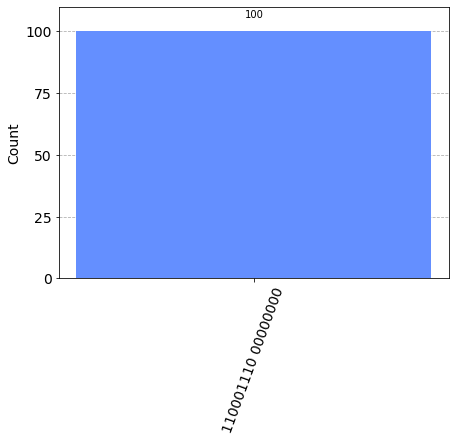

In [53]:
# Create a classical register with 3 bits
cr = ClassicalRegister(9)

# Add the classical register to the quantum circuit
new_circ.add_register(cr)
for i in range(9):
    if i not in meas_qubits:
        new_circ.measure(i,cr[i])
# Execute the circuit on the simulator
result = execute(new_circ, simulator, shots = 100).result()

# Get the counts from the result
counts = result.get_counts()


plot_histogram(counts)